In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
data.shape

(907, 27)

In [5]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [7]:
col = data[['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','latitude','longitude', 'country_long','gppd_idnr','commissioning_year','owner','url','year_of_capacity_data','generation_data_source','country','country_long']]


In [8]:
data = data.drop(columns=col, axis=1)
data.shape

(907, 11)

In [ ]:
We have dropped the unnecessary features now we have to treat NAN's by following ways

other_fuel1 - median

geolocation_source - median

generation_gwh_2014 - mean

generation_gwh_2015 - mean

generation_gwh_2016 - mean

generation_gwh_2017 - mean

generation_gwh_2018 - mean

In [9]:
#Let's fill NaN's
data['other_fuel1'].fillna(data['other_fuel1'].mode()[0], inplace=True)
data['geolocation_source'].fillna(data['geolocation_source'].mode()[0], inplace=True)
data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].median(), inplace=True)
data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].median(), inplace=True)
data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].median(), inplace=True)
data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].median(), inplace=True)
data['generation_gwh_2018'].fillna(data['generation_gwh_2018'].median(), inplace=True)

In [10]:
data.isna().sum()

name                   0
capacity_mw            0
primary_fuel           0
other_fuel1            0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [11]:
print('Shape',data.shape)
print('____________________________________________________________________________________________________')
data.describe()

Shape (907, 11)
____________________________________________________________________________________________________


,capacity_mw,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030
std,590.085456,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,801.123775,711.181225,737.205450,817.977250,751.644375
50%,59.200000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,801.123775,711.181225,737.205450,817.977250,751.644375
max,4760.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [12]:
data

,name,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,ADITYA CEMENT WORKS,98.0,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,AES Saurashtra Windfarms,39.2,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,AGARTALA GT,135.0,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,Coal,Oil,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,Solar,Oil,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375
904,Yelisirur wind power project,25.5,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
905,ZAWAR MINES,80.0,Coal,Oil,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375


In [13]:
numerics = ['int8','int16','int32','int64','float16','float32','float64']
categorical_columns = []
features=data.columns.values.tolist()

for col in features:
    if data[col].dtypes in numerics:
        continue
    data[col] = LabelEncoder().fit_transform(data[col])

data

,name,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,1,98.0,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,2,39.2,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,3,135.0,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,4,1800.0,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,902,1600.0,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000
903,903,3.0,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375
904,904,25.5,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
905,905,80.0,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375


In [14]:
#Checking and removing if there is any Duplicate entry present in our dataset
data.drop_duplicates(inplace=True)
data.shape

(907, 11)

In [ ]:
No Duplicate record(s) found

In [15]:
# Checking for Multicollinearity using VIF

w = data[list(data.columns)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(w.values, i) for i in range(w.shape[1])]
vif_info['Column'] = w.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
9,67.701482,generation_gwh_2017
10,55.959972,generation_gwh_2018
8,55.957886,generation_gwh_2016
7,43.130115,generation_gwh_2015
3,33.013445,other_fuel1
6,18.419280,generation_gwh_2014
5,13.841509,geolocation_source
1,7.249536,capacity_mw
2,4.900653,primary_fuel
0,4.037708,name


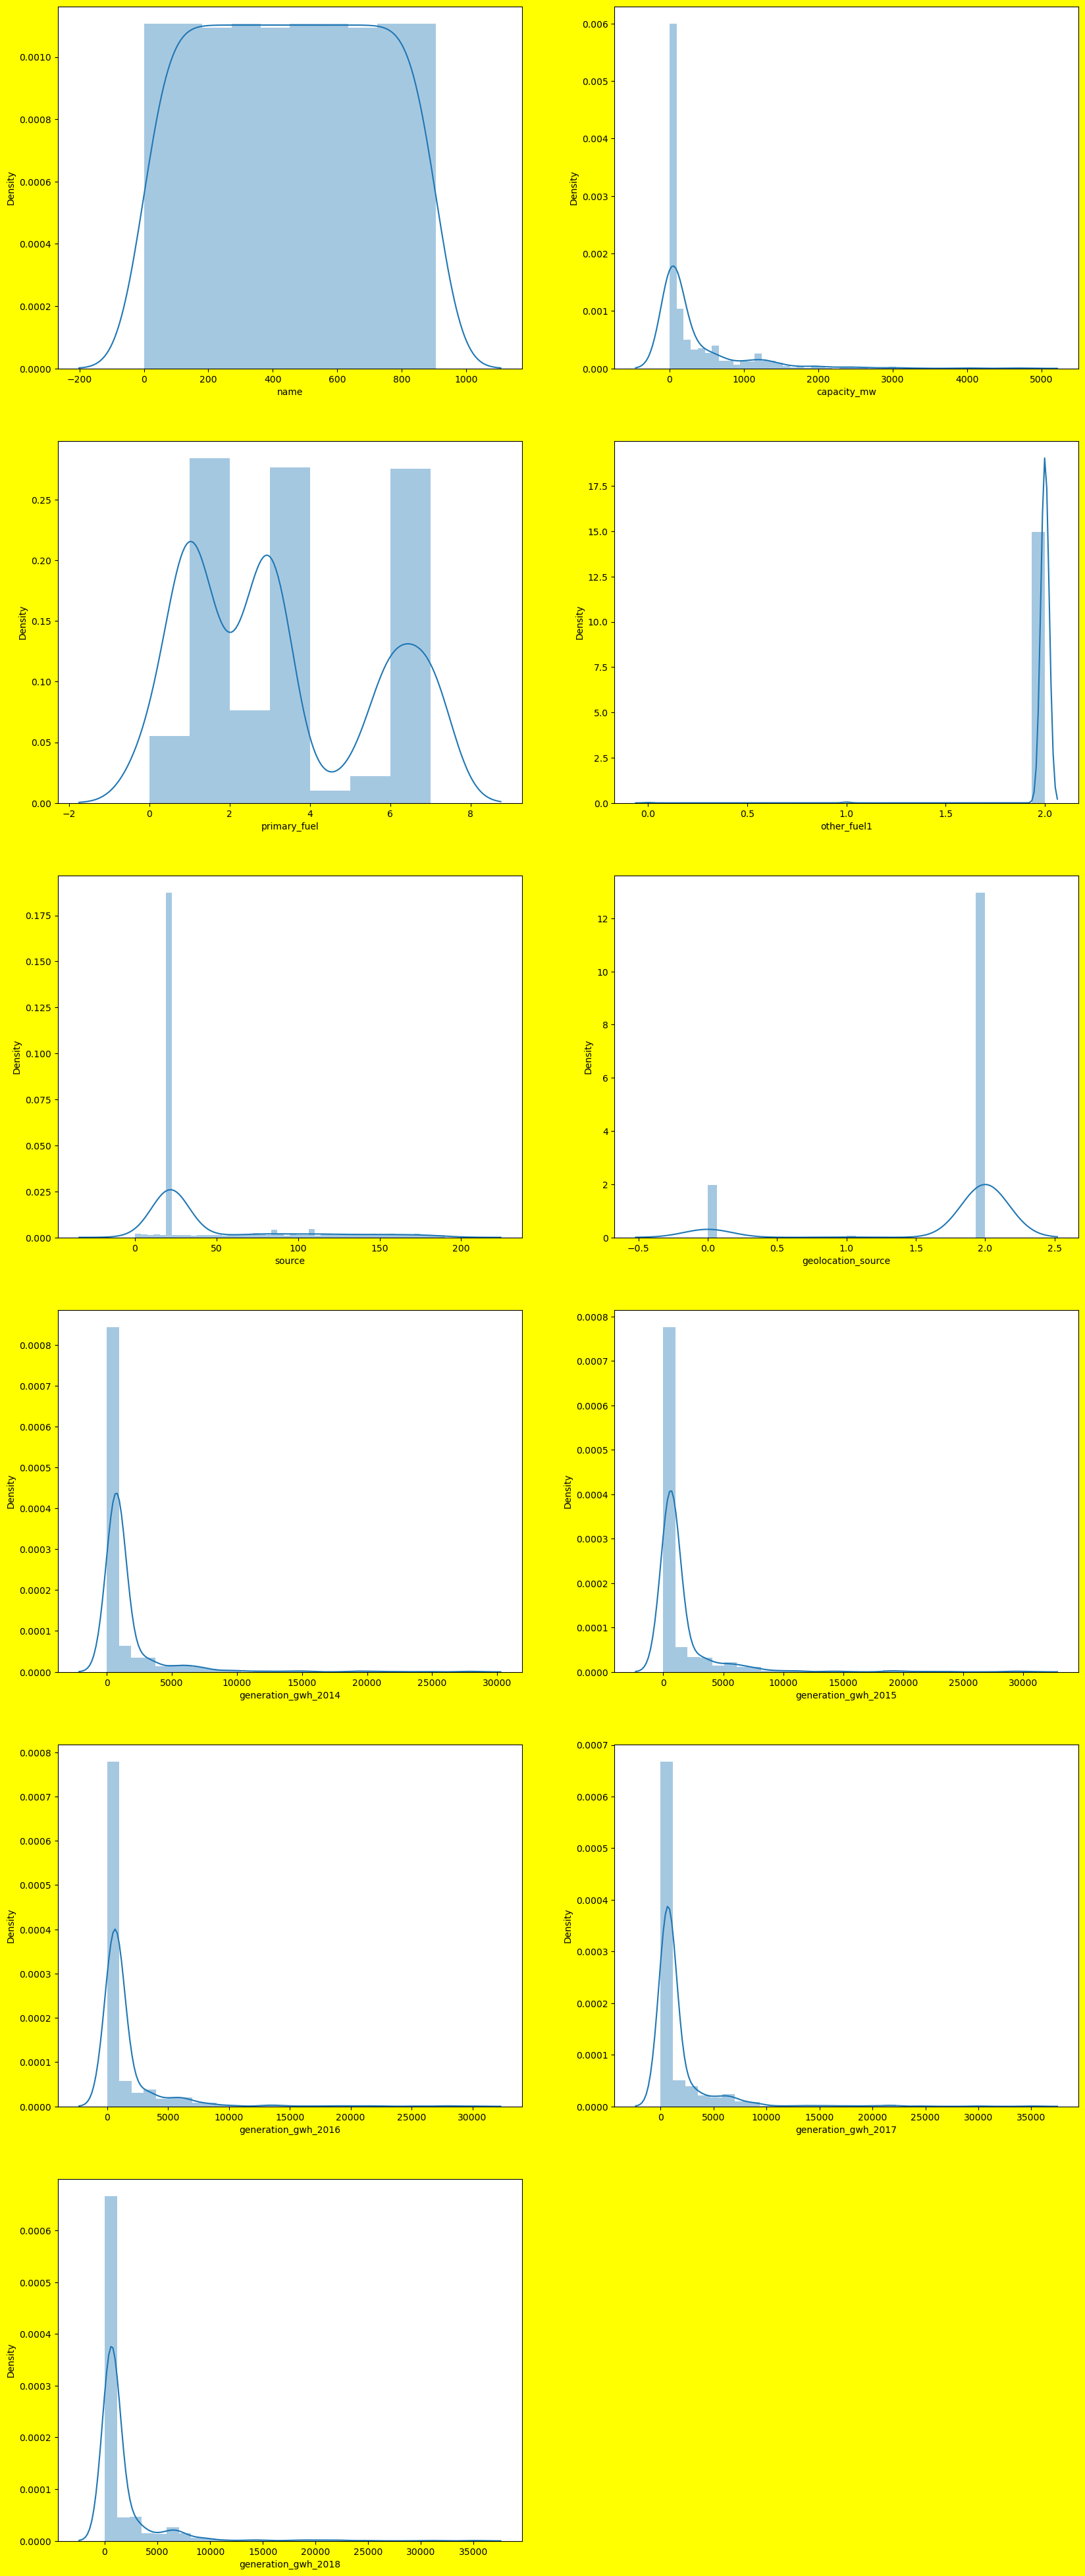

In [16]:
plt.figure(figsize=(20,50),facecolor="yellow")
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

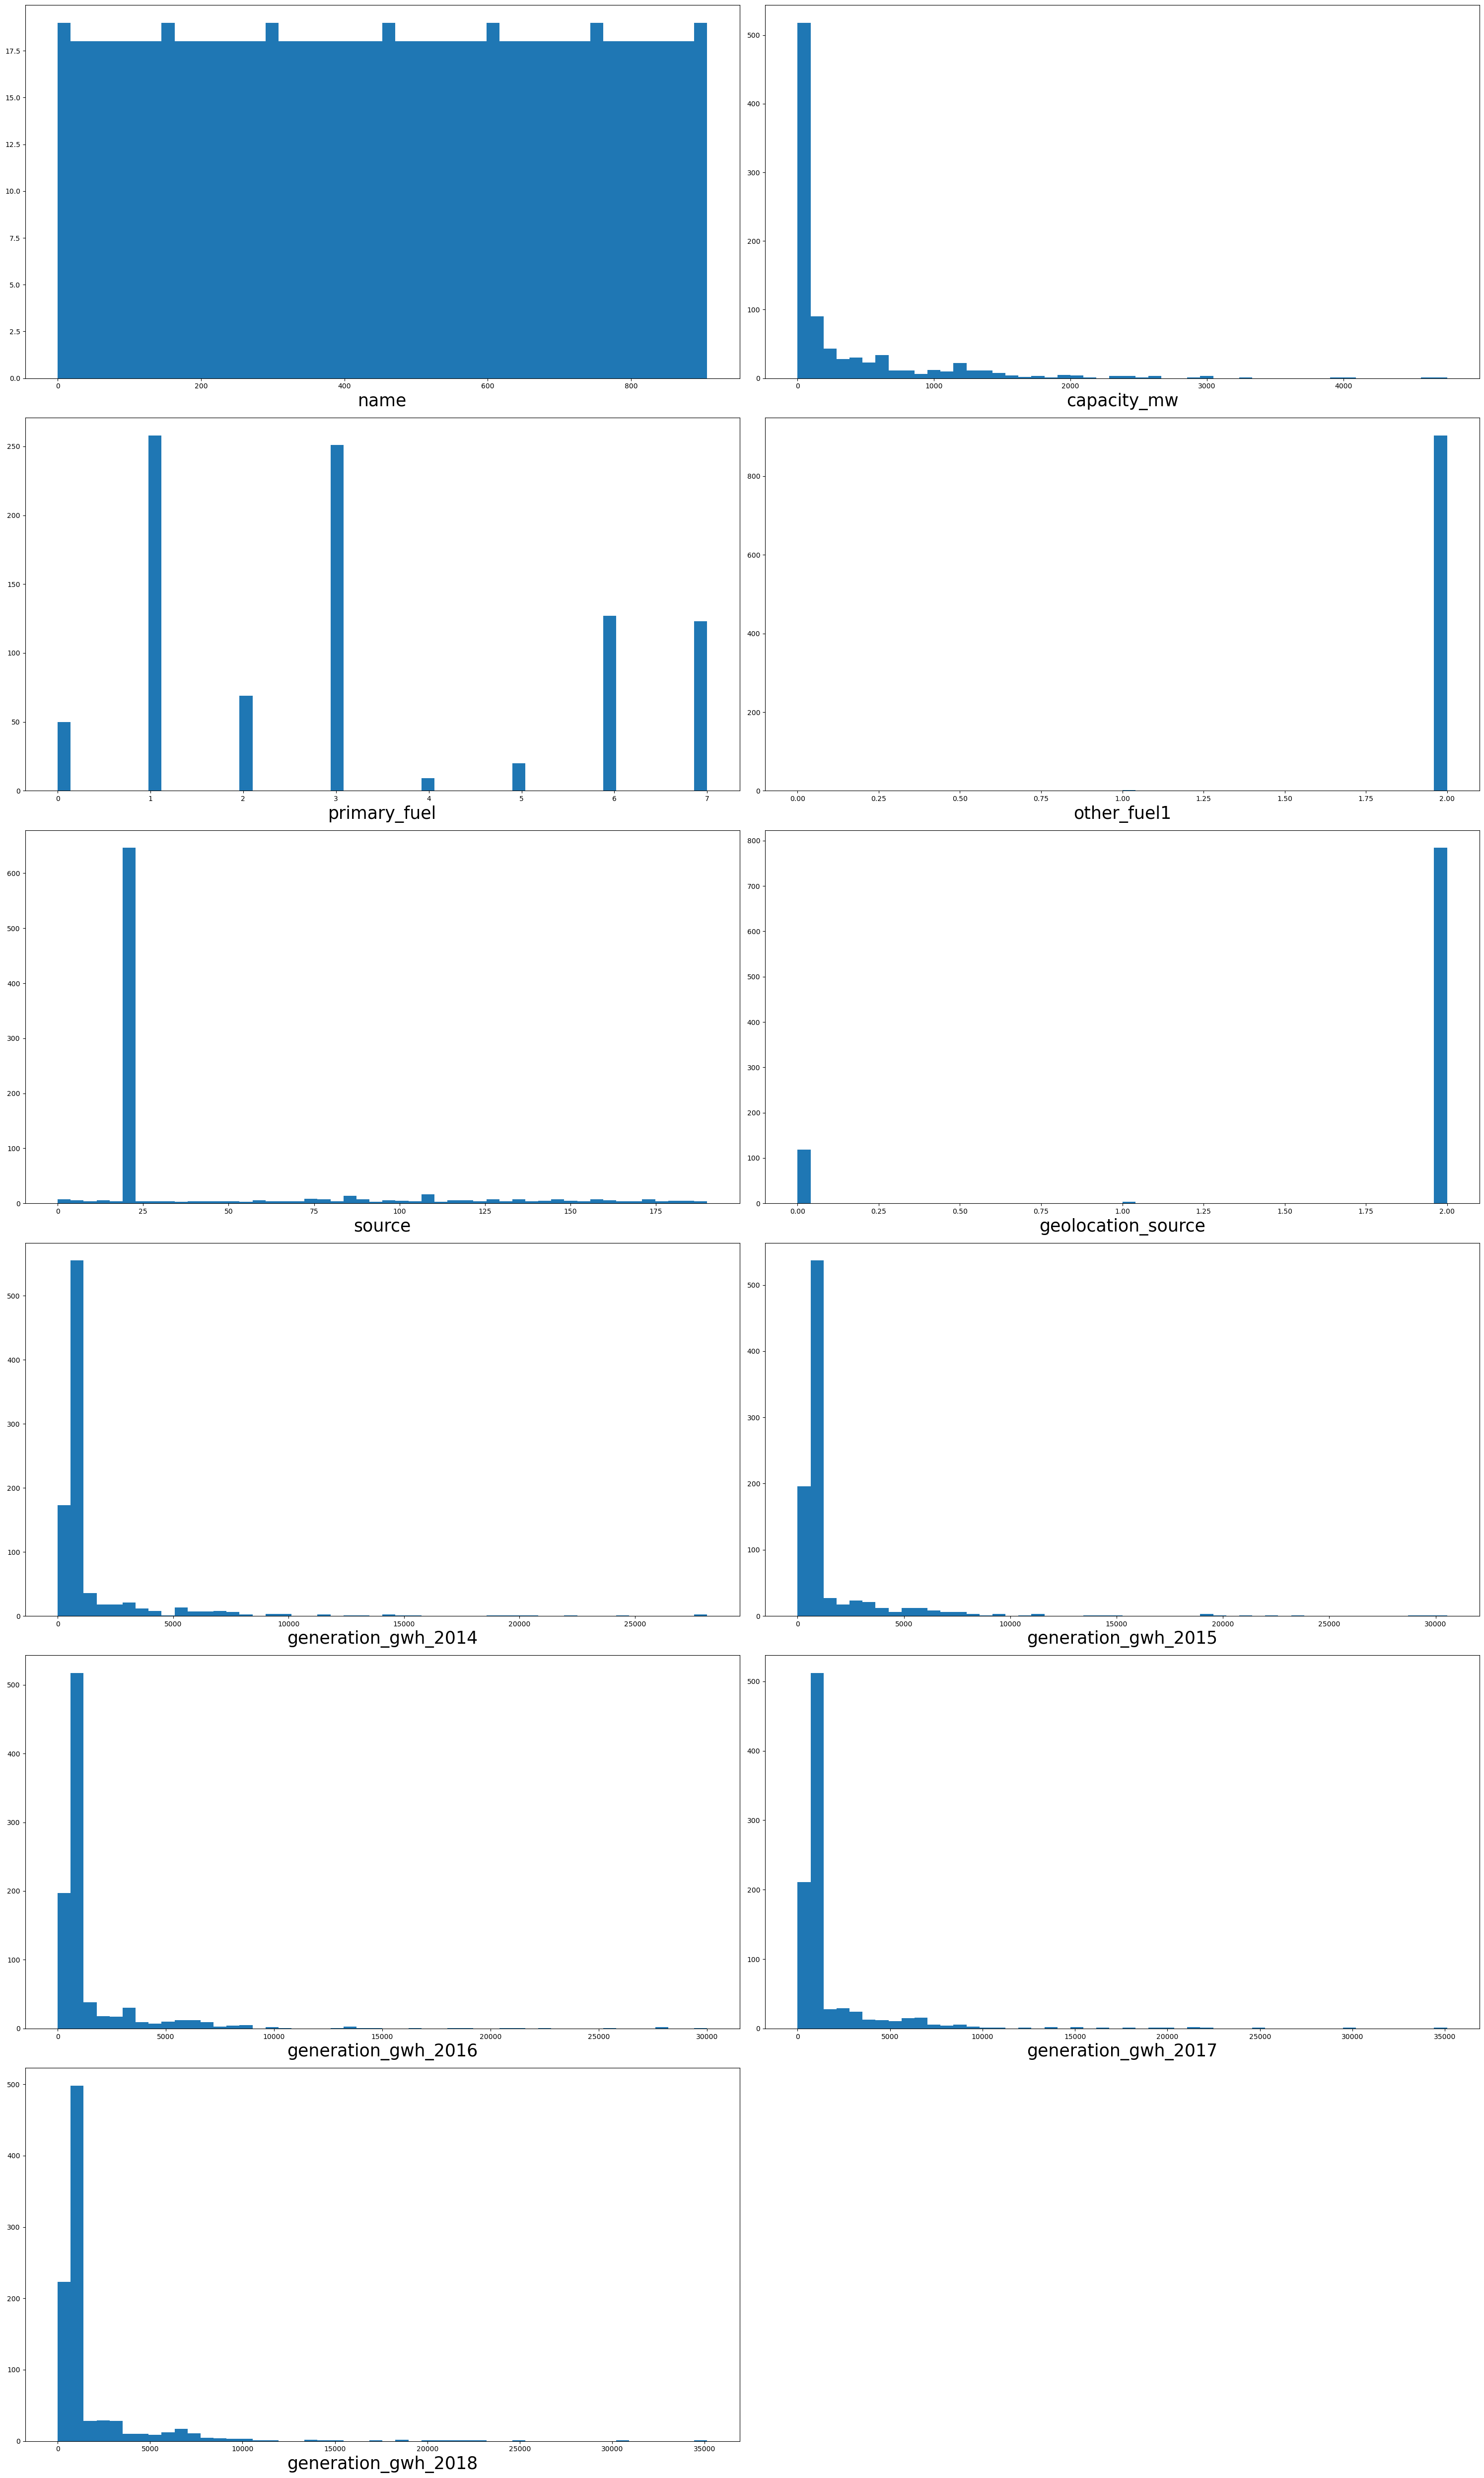

In [17]:
plt.figure(figsize=[30,50])
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        plt.hist(data[column], bins=50)
        plt.xlabel(column, fontsize=25)
    plotnumber+=1
plt.tight_layout()

In [18]:
data

,name,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,1,98.0,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,2,39.2,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,3,135.0,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,4,1800.0,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,902,1600.0,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000
903,903,3.0,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375
904,904,25.5,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
905,905,80.0,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375


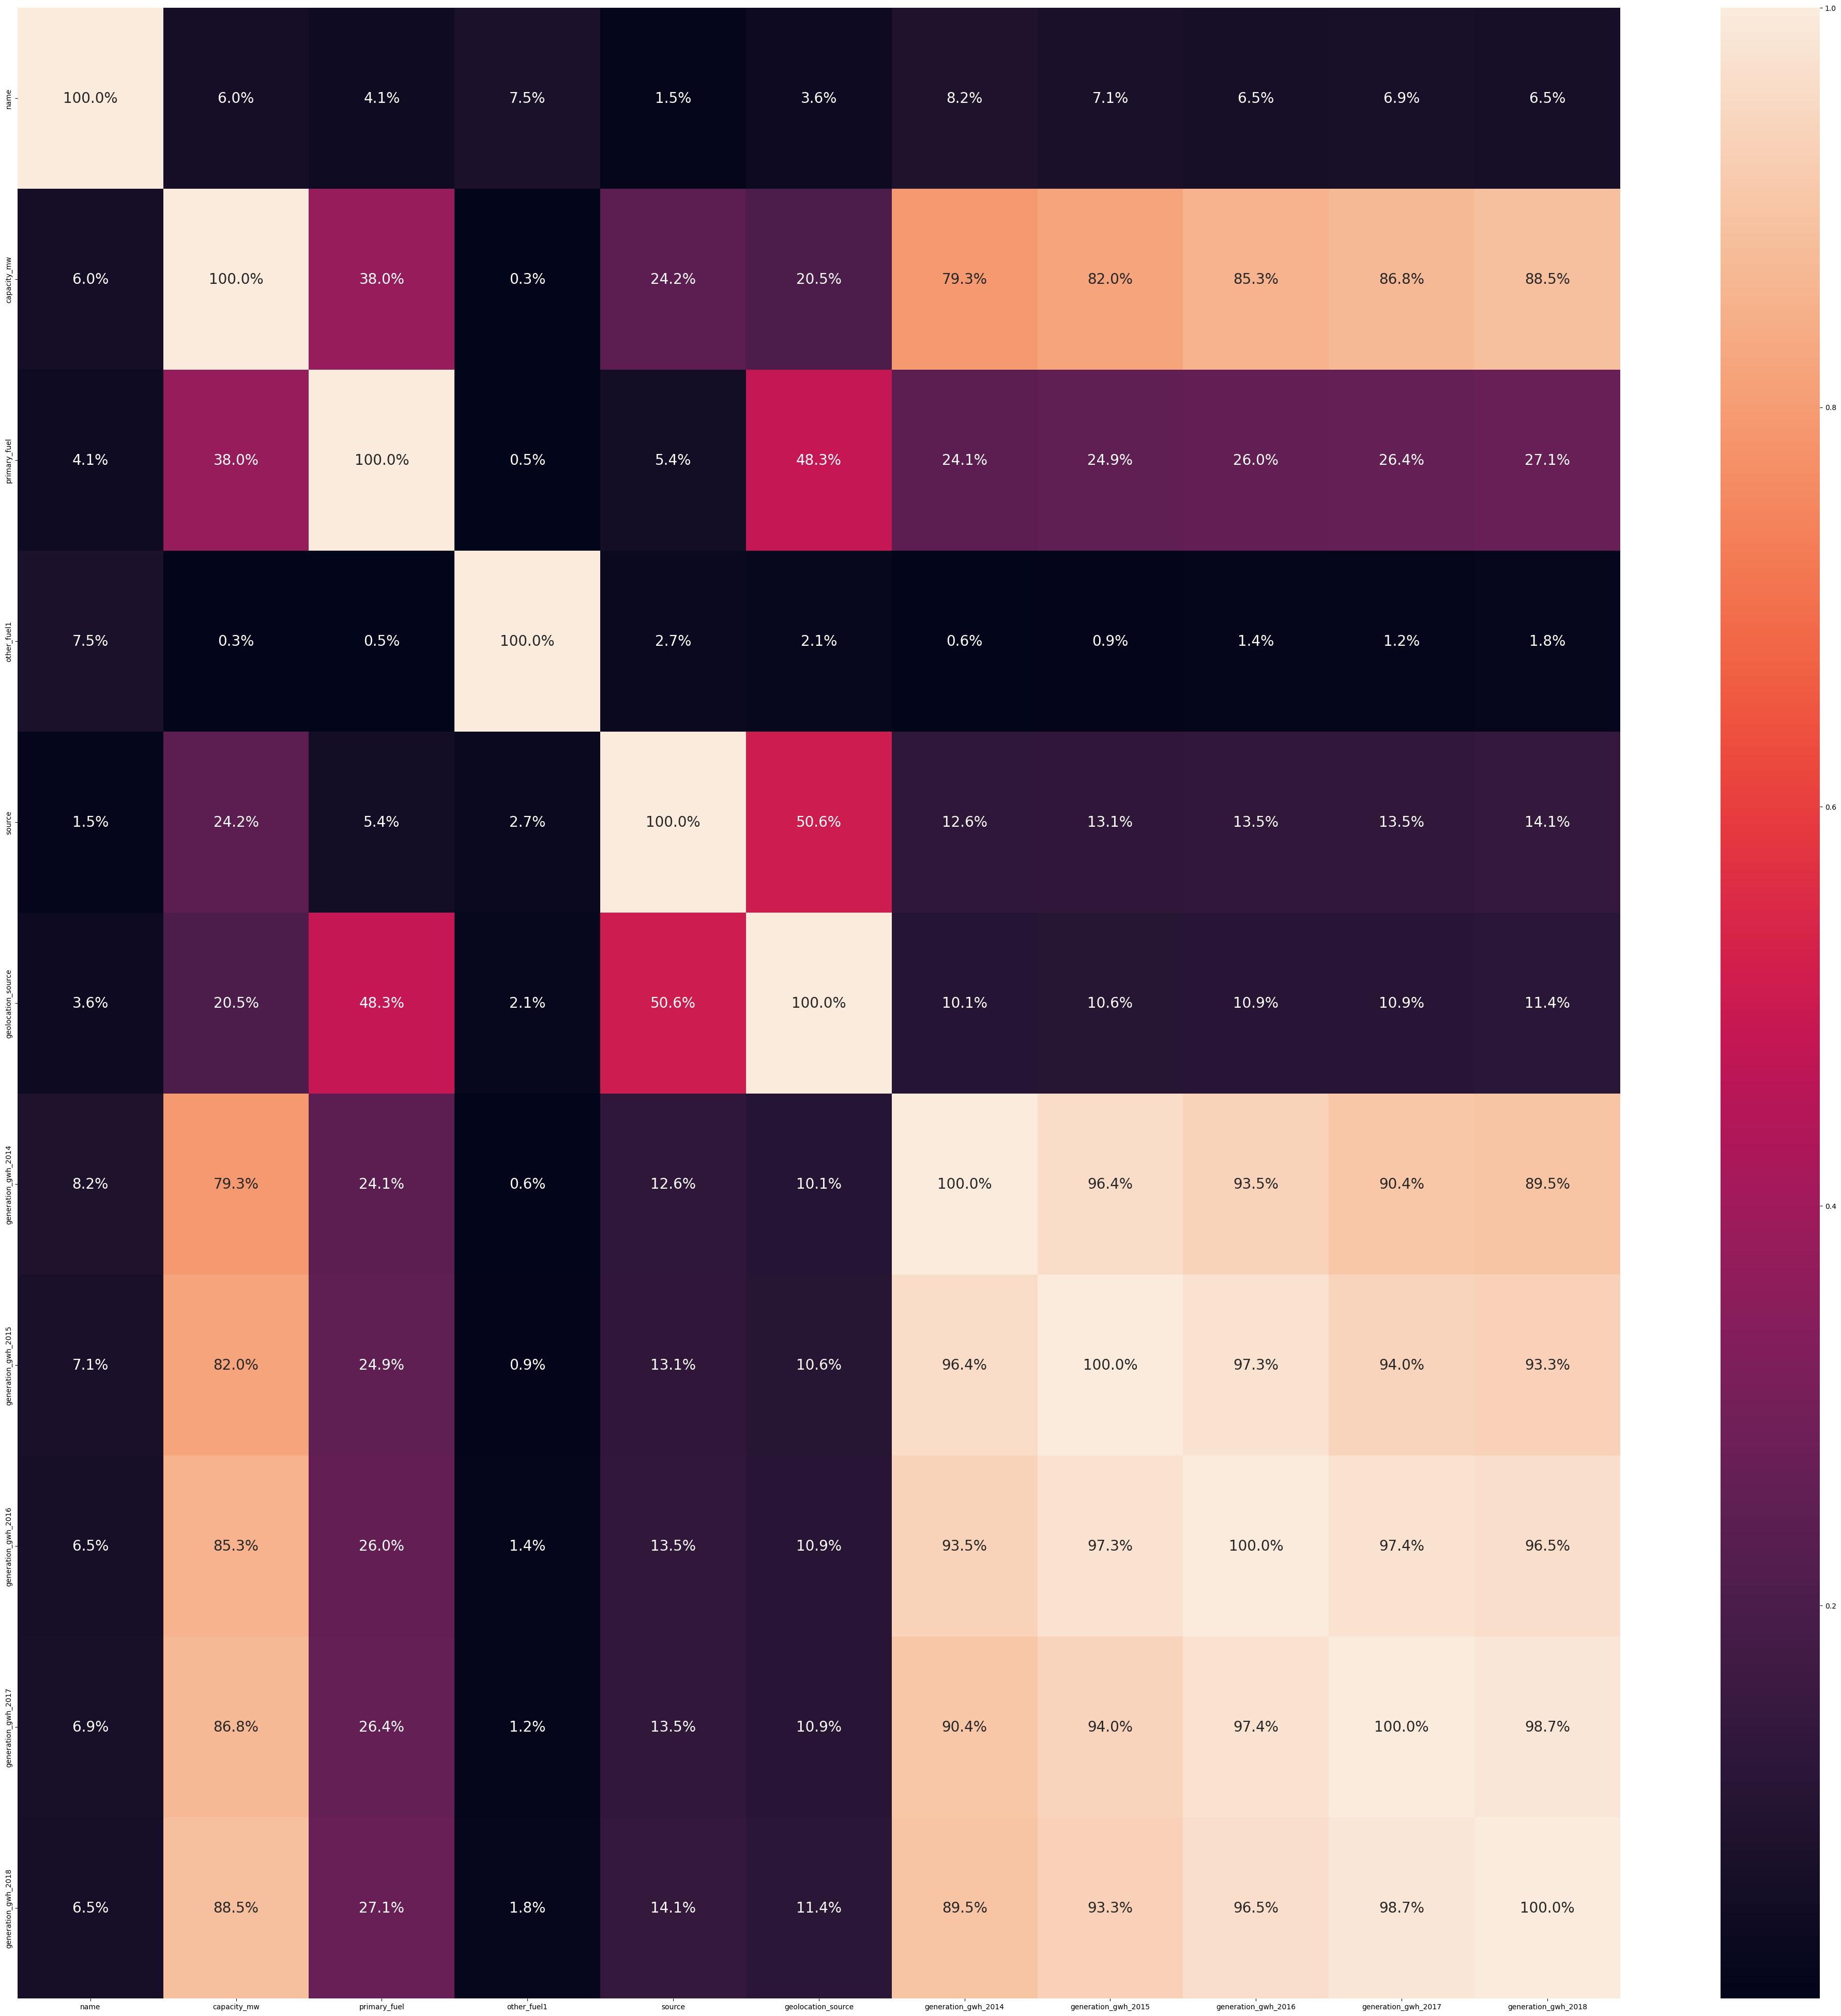

In [19]:
df_corr=data.corr().abs()
plt.figure(figsize=(50,50))
sns.heatmap(df_corr,annot=True, annot_kws={'size':20}, fmt='.1%')
plt.show()

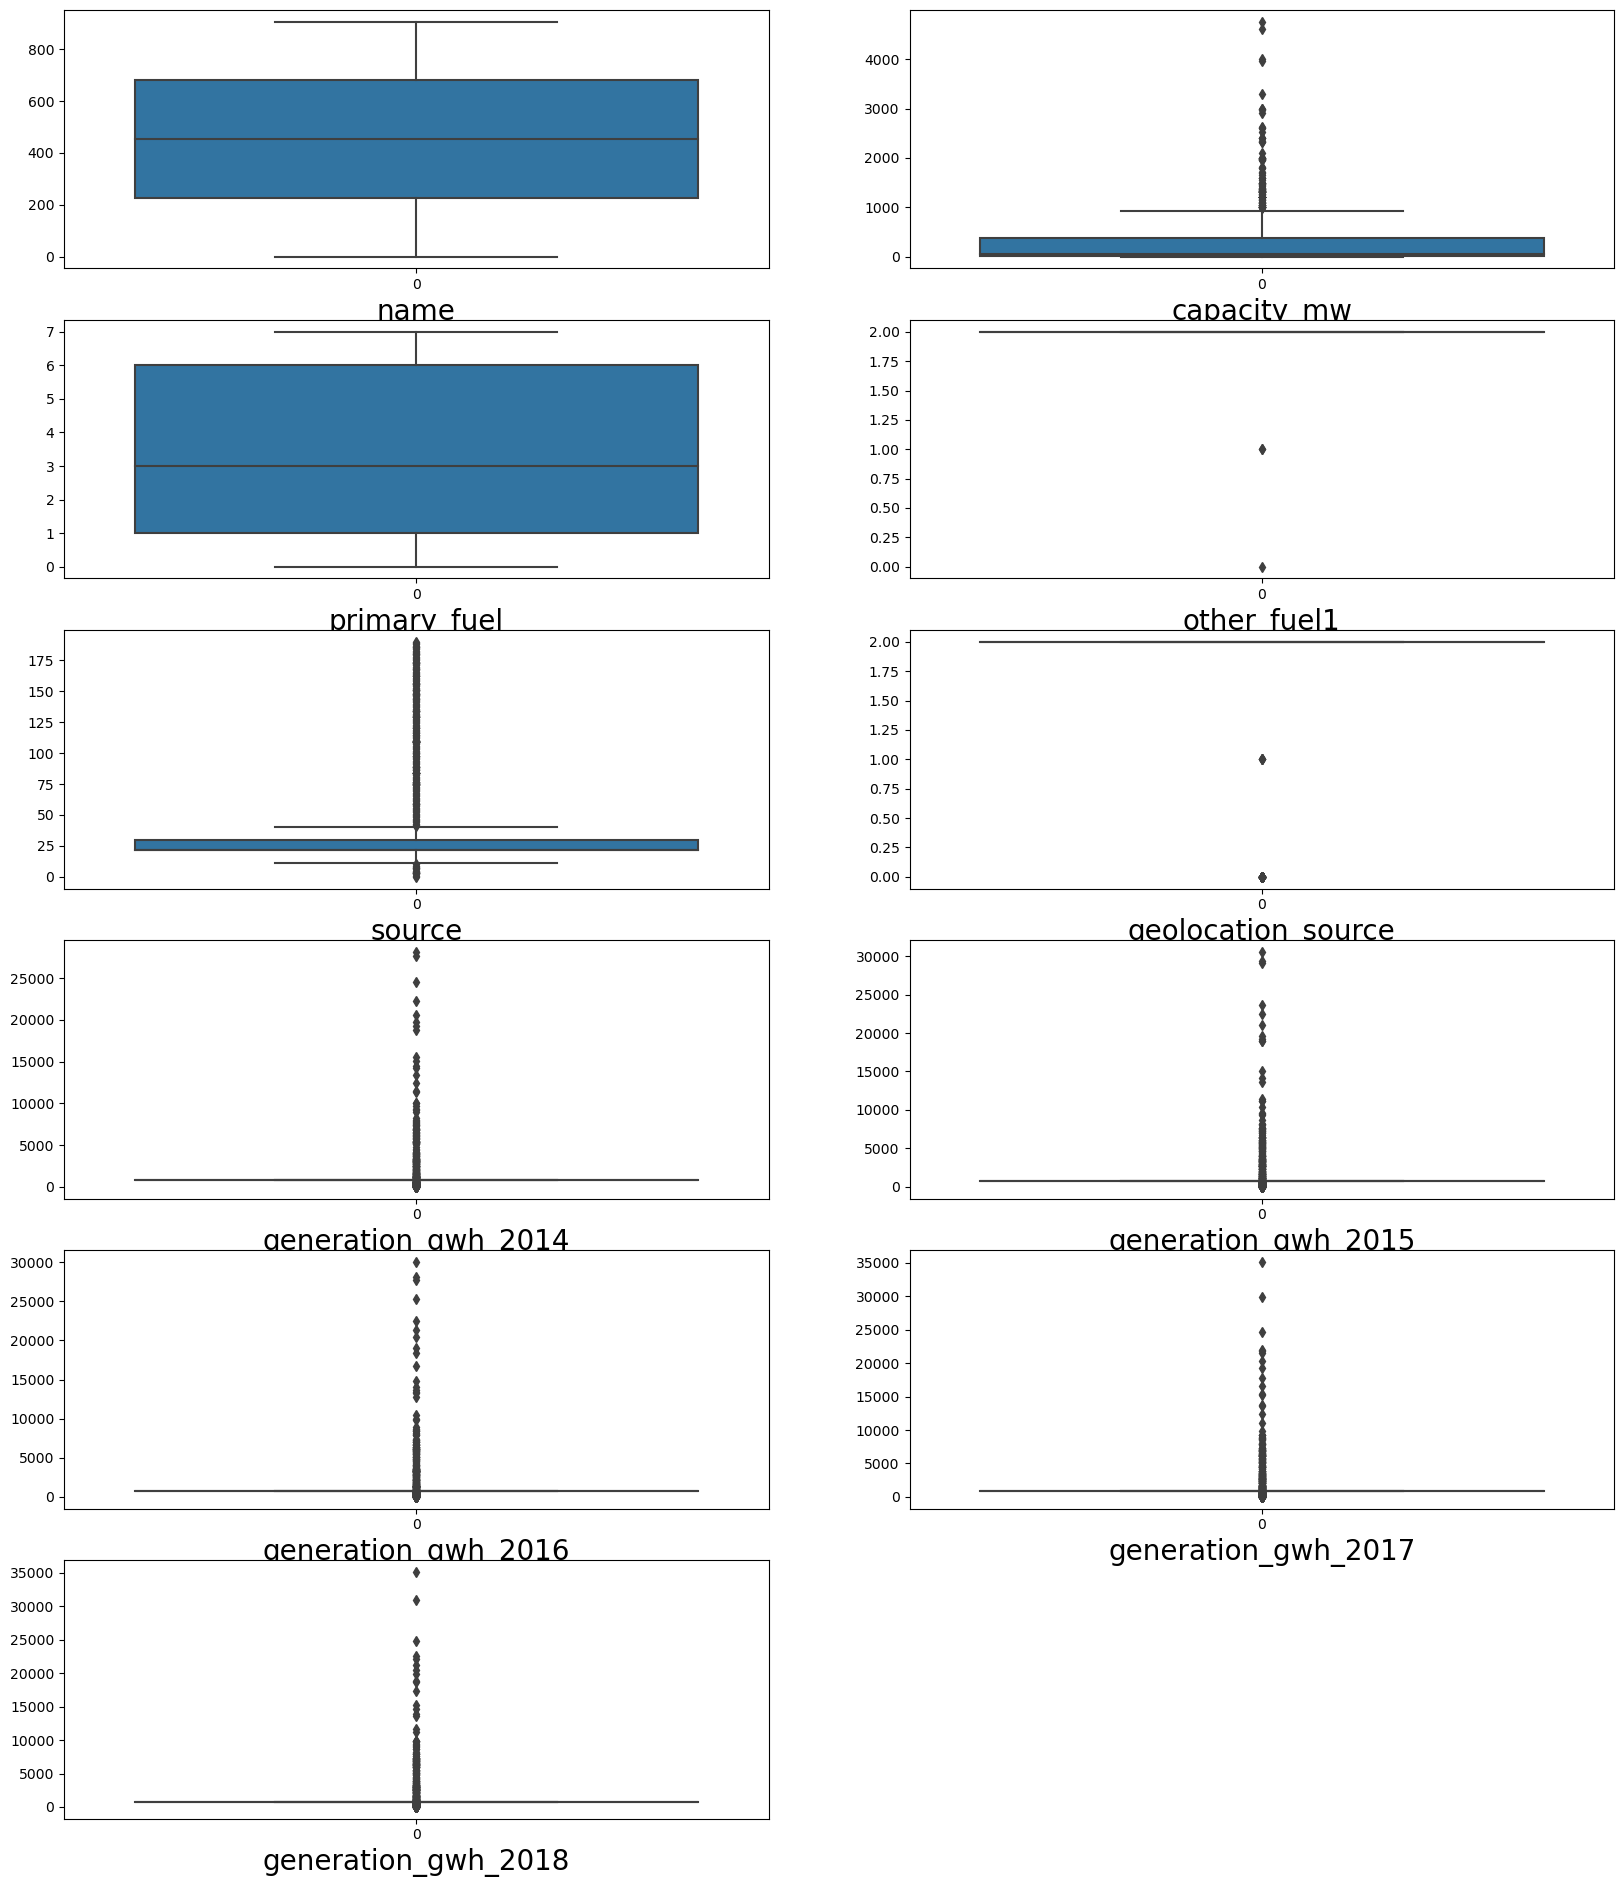

In [20]:
#Let's check for outliers
plt.figure(figsize=(20,100))
graph=1
for column in data:
    if plotnumber<=50:
        ax=plt.subplot(25,2,graph)
        sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=20)
    graph+=1
plt.show()

In [21]:
from scipy.stats import zscore
z= np.abs(zscore(data))

In [22]:
threshold= 3 
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
       147, 158, 191, 209, 209, 209, 209, 209, 209, 299, 308, 308, 308,
       308, 308, 308, 321, 345, 363, 364, 364, 364, 364, 364, 364, 375,
       482, 482, 493, 493, 493, 493, 493, 493, 494, 494, 494, 494, 494,
       494, 532, 623, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657,
       657, 657, 661, 669, 689, 695, 695, 695, 695, 695, 695, 721, 721,
       721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726, 726,
       726, 767, 786, 786, 786, 786, 786, 786, 788, 808, 808, 808, 808,
       808, 808, 811, 813, 817, 832, 870, 871, 879, 880, 880, 880, 880,
       880, 880, 895, 900], dtype=int64), array([ 1,  7,  8,  9, 10,  4,  4,  1,  6,  7,  8,  9, 10,  1,  6,  4,  1,
        6,  7,  8,  9, 10,  4,  1,  6,  7,  8,  9, 10,  4,  4,  1,  1,  6,
        7,  8,  9, 10,  1,  1, 10,  1,  6,  7,  8,  9, 10,  1,  6,  7,  8,
        9, 10,  6,  6,  1,  6,  7,  8,  9, 10,  1,  6,  7,  8,  9, 10,  4,
        4

In [23]:
df=data[(z<3).all(axis=1)]
print(data.shape)
print(df.shape)

(907, 11)
(864, 11)


In [24]:
data['primary_fuel'].value_counts()  

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

In [25]:
# Let us know split our data into Features & labels

x=data.drop('primary_fuel', axis=1)
y=data['primary_fuel']

In [26]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [27]:
# Now let's split our data into Train_test_split

x_train, x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25, random_state=44)

In [28]:
y_train.value_counts()

3    194
1    194
7     93
6     87
2     54
0     32
5     18
4      8
Name: primary_fuel, dtype: int64

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [32]:
#Training of Models starts here

lr.fit(x_train,y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)

print('Training completed')

Training completed


In [33]:
#Let's check the scores now

print(lr.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(dt.score(x_test,y_test))
print(rf.score(x_test,y_test))

0.6211453744493393
0.6872246696035242
0.748898678414097
0.788546255506608


In [34]:
lr_pred = lr.predict(x_test)
knn_pred = knn.predict(x_test)
dt_pred = dt.predict(x_test)
rf_pred = rf.predict(x_test)

In [35]:
print('Logistic Regression:',accuracy_score(y_test,lr_pred))
print('KNN :',accuracy_score(y_test,knn_pred))
print('Decision Tree :', accuracy_score(y_test,dt_pred))
print('Random Forest :',accuracy_score(y_test,rf_pred))

Logistic Regression: 0.6211453744493393
KNN : 0.6872246696035242
Decision Tree : 0.748898678414097
Random Forest : 0.788546255506608
